**Group Project Deliverable #1**
Raquel Domingos, Dikshanta KC, Patrick Kilshaw
17 June 2021


In [115]:
# import packages here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import dexplot as dxp
# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [116]:
#data imported
df_data = pd.read_csv("la_loans.csv")

In [117]:
df_data.rename(columns={'applicant_income_000s':'ApplicantIncome'}, inplace=True)
df_data.rename(columns={'applicant_sex':'ApplicantGender'}, inplace=True)
df_data.rename(columns={'loan_amount_000s':'loanAmount'}, inplace=True)

In [118]:
df_data.iloc[:,:]

,app_accepted,respondent_id,agency_name,agency_abbr,loan_type_name,property_type_name,loan_purpose_name,owner_occupancy_name,loanAmount,preapproval_name,...,ApplicantIncome,purchaser_type_name,hoepa_status_name,lien_status_name,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
0,1,463735,Consumer Financial Protection Bureau,CFPB,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,424,Not applicable,...,212.0,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a first lien,8060.0,6.440000,63300.0,179.789993,2432.0,3051.0
1,1,13951,Federal Deposit Insurance Corporation,FDIC,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Not owner-occupied as a principal dwelling,58,Not applicable,...,125.0,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a first lien,3412.0,26.290001,53700.0,88.519997,541.0,1856.0
2,1,75-2921540,Department of Housing and Urban Development,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,87,Not applicable,...,NaN,Freddie Mac (FHLMC),Not a HOEPA loan,Secured by a first lien,11628.0,16.139999,68100.0,169.660004,3549.0,4049.0
3,0,233031,Consumer Financial Protection Bureau,CFPB,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,80,Not applicable,...,160.0,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a first lien,3412.0,26.290001,53700.0,88.519997,541.0,1856.0
4,0,233031,Consumer Financial Protection Bureau,CFPB,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Not owner-occupied as a principal dwelling,64,Not applicable,...,73.0,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a subordinate lien,2667.0,66.970001,53700.0,65.779999,209.0,1081.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148991,0,32974,Federal Deposit Insurance Corporation,FDIC,Conventional,Multifamily dwelling,Home purchase,Not applicable,529,Not applicable,...,NaN,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a first lien,1364.0,14.300000,63300.0,236.710007,373.0,797.0
148992,0,81-2566626,Department of Housing and Urban Development,HUD,Conventional,Multifamily dwelling,Refinancing,Not applicable,1670,Not applicable,...,NaN,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a first lien,6573.0,64.000000,63300.0,75.879997,966.0,1923.0
148993,0,81-2566626,Department of Housing and Urban Development,HUD,FHA-insured,Multifamily dwelling,Refinancing,Not applicable,5440,Not applicable,...,NaN,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a first lien,4163.0,95.650002,68100.0,28.990000,48.0,633.0
148994,0,14168,Office of the Comptroller of the Currency,OCC,Conventional,Multifamily dwelling,Home purchase,Not applicable,446,Not applicable,...,NaN,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a first lien,7012.0,91.910004,58500.0,64.610001,1217.0,2728.0


In [119]:
df_data.tail(20)

,app_accepted,respondent_id,agency_name,agency_abbr,loan_type_name,property_type_name,loan_purpose_name,owner_occupancy_name,loanAmount,preapproval_name,...,ApplicantIncome,purchaser_type_name,hoepa_status_name,lien_status_name,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
148976,0,32974,Federal Deposit Insurance Corporation,FDIC,Conventional,Multifamily dwelling,Home purchase,Not applicable,942,Not applicable,...,NaN,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a first lien,7347.0,87.440002,63300.0,92.019997,1620.0,2433.0
148977,0,808176,Consumer Financial Protection Bureau,CFPB,Conventional,Multifamily dwelling,Home purchase,Not applicable,800,Not applicable,...,NaN,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a first lien,2070.0,13.860000,63300.0,173.820007,524.0,1619.0
148978,0,9320,Federal Deposit Insurance Corporation,FDIC,Conventional,Multifamily dwelling,Home purchase,Not applicable,2853,Not applicable,...,NaN,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a first lien,6390.0,51.330002,52600.0,72.849998,1569.0,2286.0
148979,0,808176,Consumer Financial Protection Bureau,CFPB,Conventional,Multifamily dwelling,Home purchase,Not applicable,188,Not applicable,...,NaN,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a first lien,4118.0,45.730000,68100.0,48.480000,86.0,952.0
148980,0,808176,Consumer Financial Protection Bureau,CFPB,Conventional,Multifamily dwelling,Home purchase,Not applicable,896,Not applicable,...,NaN,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a first lien,6711.0,64.059998,68100.0,61.340000,413.0,2325.0
148981,0,17388,Federal Deposit Insurance Corporation,FDIC,Conventional,Multifamily dwelling,Home improvement,Owner-occupied as a principal dwelling,500,Not applicable,...,NaN,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a first lien,5865.0,25.930000,55900.0,77.599998,1544.0,2252.0
148982,0,38-2799035,Department of Housing and Urban Development,HUD,FHA-insured,Multifamily dwelling,Refinancing,Owner-occupied as a principal dwelling,251,Not applicable,...,NaN,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a first lien,1603.0,86.529999,63300.0,41.410000,317.0,992.0
148983,0,17388,Federal Deposit Insurance Corporation,FDIC,Conventional,Multifamily dwelling,Refinancing,Not owner-occupied as a principal dwelling,660,Not applicable,...,NaN,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a first lien,943.0,85.680000,63300.0,34.180000,38.0,204.0
148984,0,32974,Federal Deposit Insurance Corporation,FDIC,Conventional,Multifamily dwelling,Refinancing,Not applicable,427,Not applicable,...,NaN,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a first lien,1322.0,35.250000,63300.0,97.650002,308.0,711.0
148985,0,451965,Consumer Financial Protection Bureau,CFPB,Conventional,Multifamily dwelling,Home purchase,Not applicable,439,Not applicable,...,NaN,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a first lien,4864.0,88.489998,68100.0,43.740002,573.0,937.0


In [120]:
df_data.describe()

,app_accepted,loanAmount,ApplicantGender,ApplicantIncome,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
count,148996.000000,148996.000000,148996.000000,135141.000000,145715.000000,145715.000000,145715.000000,145715.000000,145715.000000,145715.000000
mean,0.559230,164.155742,1.523229,90.640857,5790.106701,33.987342,59589.701815,112.088414,1562.809525,2202.367615
std,0.496481,374.476442,0.765829,502.567417,2860.910917,24.677483,6779.225197,39.329715,897.877141,1010.090677
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,47200.000000,0.000000,0.000000,0.000000
25%,0.000000,75.000000,1.000000,43.000000,3689.000000,15.470000,53700.000000,84.019997,936.000000,1480.000000
50%,1.000000,134.000000,1.000000,65.000000,5293.000000,26.639999,61600.000000,108.879997,1416.000000,2084.000000
75%,1.000000,203.000000,2.000000,102.000000,7323.000000,47.400002,63300.000000,134.199997,2014.000000,2721.000000
max,1.000000,43448.000000,4.000000,147417.000000,16628.000000,100.000000,68100.000000,333.570007,4838.000000,5690.000000


In [121]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148996 entries, 0 to 148995
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   app_accepted                    148996 non-null  int64  
 1   respondent_id                   148996 non-null  object 
 2   agency_name                     148996 non-null  object 
 3   agency_abbr                     148996 non-null  object 
 4   loan_type_name                  148996 non-null  object 
 5   property_type_name              148996 non-null  object 
 6   loan_purpose_name               148996 non-null  object 
 7   owner_occupancy_name            148996 non-null  object 
 8   loanAmount                      148996 non-null  int64  
 9   preapproval_name                148996 non-null  object 
 10  applicant_ethnicity_name        148996 non-null  object 
 11  co_applicant_ethnicity_name     148996 non-null  object 
 12  applicant_race_n

In [122]:
# deleted applicant_race_name_2 and co_applicant_race_name_2 which each had over 99% missing data
del df_data['applicant_race_name_2']
del df_data['co_applicant_race_name_2'] 

#Deleted agency_name, ussed agency_abbr in its place. Deleted applicant_sex_name, used applicant_sex in its place.
del df_data['agency_name'] 
del df_data['applicant_sex_name']

#drop respondent_id column
del df_data['respondent_id']

In [123]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148996 entries, 0 to 148995
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   app_accepted                    148996 non-null  int64  
 1   agency_abbr                     148996 non-null  object 
 2   loan_type_name                  148996 non-null  object 
 3   property_type_name              148996 non-null  object 
 4   loan_purpose_name               148996 non-null  object 
 5   owner_occupancy_name            148996 non-null  object 
 6   loanAmount                      148996 non-null  int64  
 7   preapproval_name                148996 non-null  object 
 8   applicant_ethnicity_name        148996 non-null  object 
 9   co_applicant_ethnicity_name     148996 non-null  object 
 10  applicant_race_name_1           148996 non-null  object 
 11  co_applicant_race_name_1        148996 non-null  object 
 12  ApplicantGender 

In [124]:
#Plot the pairwise joint distributions from the DataFrame 
#sns.pairplot(df_data)

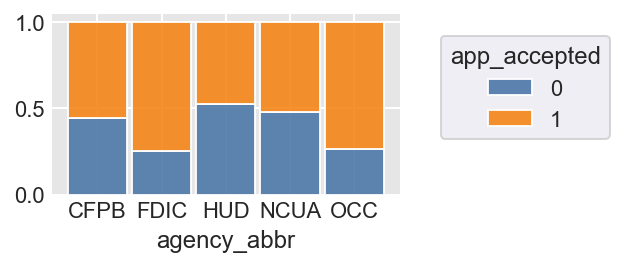

In [125]:
#Binning of Categorical Variables - Shows the relative frequency at which each category has a loan application accepted or denied
# Category values which have similar proportions of accepted and denied were binned together.
#Categorical variables were limited to five unique values to limit exessive model training times.
df_data['agency_abbr'] = df_data['agency_abbr'].replace({'FRS' : 'OCC'})
dxp.count(val = 'agency_abbr', data = df_data, split = 'app_accepted', stacked = True, normalize = 'agency_abbr')


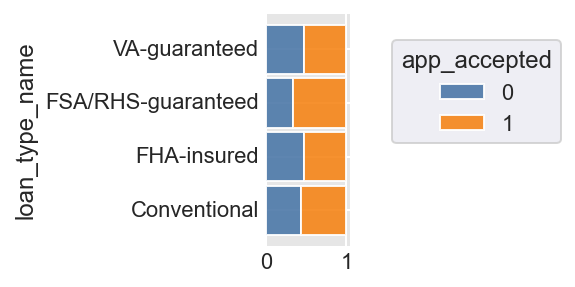

In [126]:
#Binning of Categorical Variables - Cont.
dxp.count(val = 'loan_type_name', data = df_data, split = 'app_accepted', stacked = True, normalize = 'loan_type_name', orientation = "h")


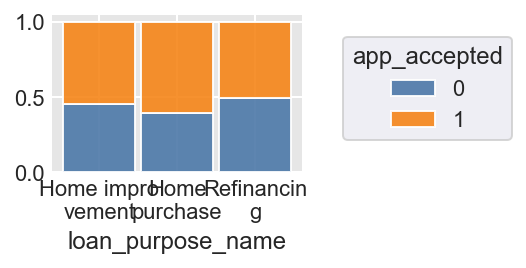

In [127]:
#Binning of Categorical Variables - Cont.
dxp.count(val = 'loan_purpose_name', data = df_data, split = 'app_accepted', stacked = True, normalize = 'loan_purpose_name')  

C:\Users\pkils\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


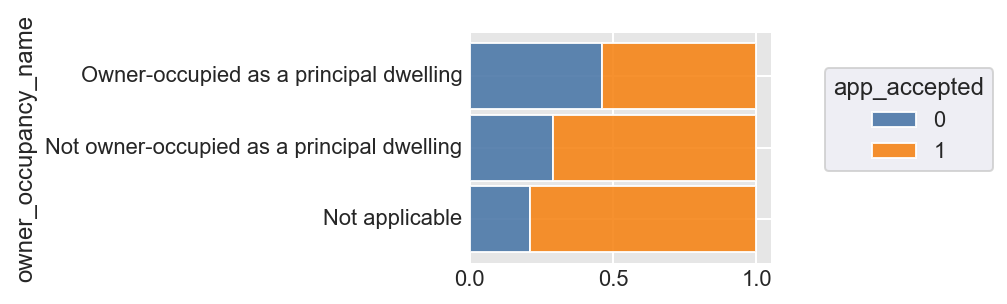

In [128]:
#Binning of Categorical Variables - Cont.
dxp.count(val = 'owner_occupancy_name', data = df_data, split = 'app_accepted', stacked = True, normalize = 'owner_occupancy_name', orientation = "h")

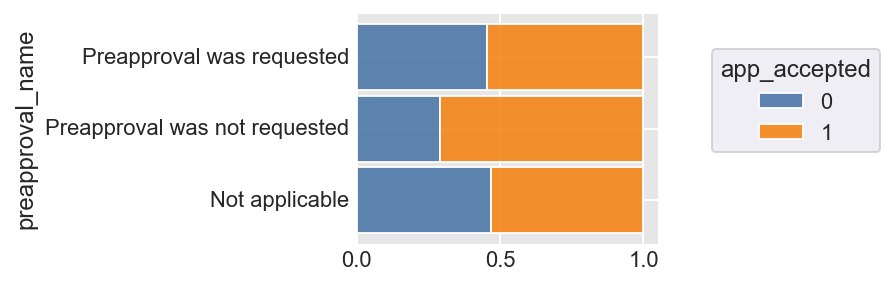

In [129]:
#Binning of Categorical Variables - Cont.
dxp.count(val = 'preapproval_name', data = df_data, split = 'app_accepted', stacked = True, normalize = 'preapproval_name', orientation = "h")  

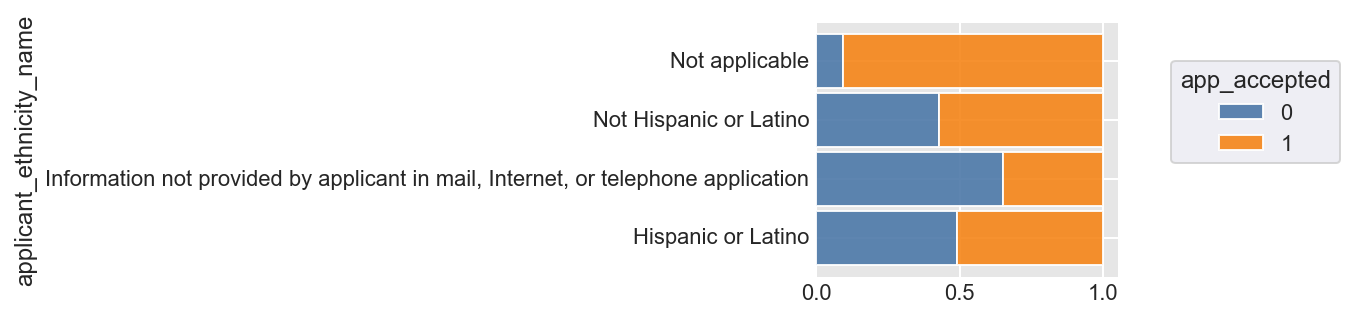

In [130]:
#Binning of Categorical Variables - Cont.
dxp.count(val = 'applicant_ethnicity_name', data = df_data, split = 'app_accepted', stacked = True, normalize = 'applicant_ethnicity_name', orientation = "h")  

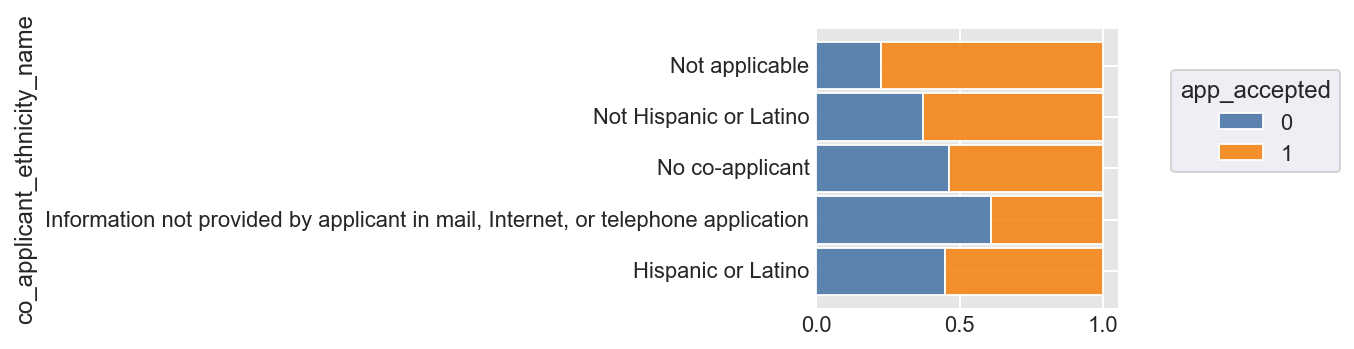

In [131]:
#Binning of Categorical Variables - Cont.
dxp.count(val = 'co_applicant_ethnicity_name', data = df_data, split = 'app_accepted', stacked = True, normalize = 'co_applicant_ethnicity_name', orientation = "h") 

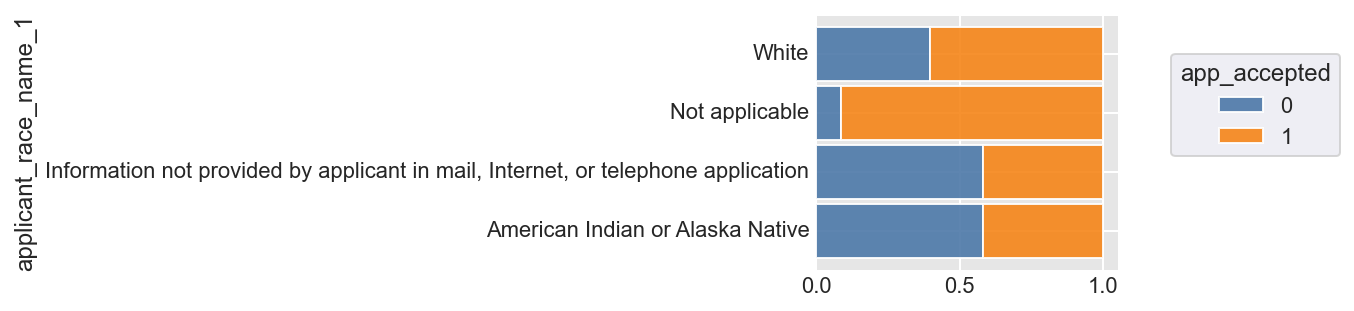

In [132]:
#Binning of Categorical Variables - Category values which have similar proportions of accepted and denied were binned together.
df_data['applicant_race_name_1'] = df_data['applicant_race_name_1'].replace({'Native Hawaiian or Other Pacific Islander' : 'White'})
df_data['applicant_race_name_1'] = df_data['applicant_race_name_1'].replace({'Asian' : 'White'})
df_data['applicant_race_name_1'] = df_data['applicant_race_name_1'].replace({'Black or African American' : 'American Indian or Alaska Native'})
dxp.count(val = 'applicant_race_name_1', data = df_data, split = 'app_accepted', stacked = True, normalize = 'applicant_race_name_1', orientation = "h")  

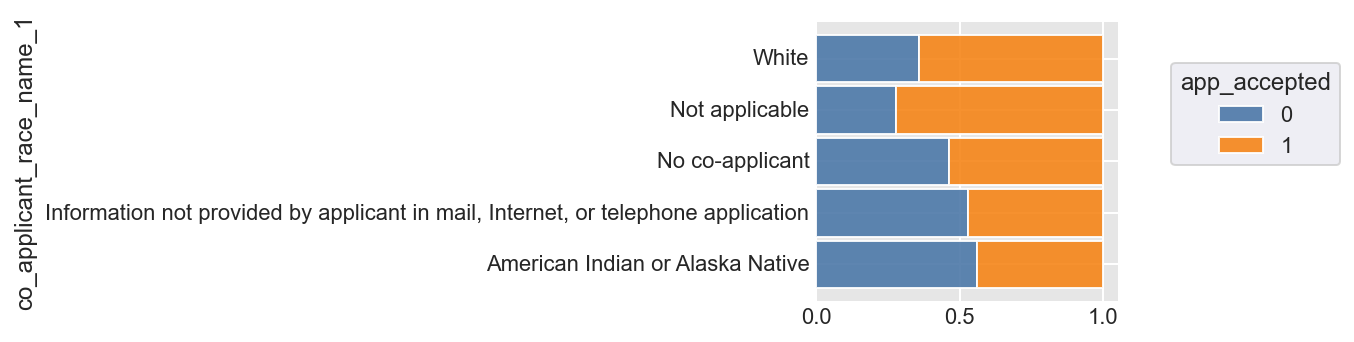

In [133]:
#Binning of Categorical Variables - Category values which have similar proportions of acceepted and denied were binned together.
df_data['co_applicant_race_name_1'] = df_data['co_applicant_race_name_1'].replace({'Native Hawaiian or Other Pacific Islander' : 'White'})
df_data['co_applicant_race_name_1'] = df_data['co_applicant_race_name_1'].replace({'Asian' : 'White'})
df_data['co_applicant_race_name_1'] = df_data['co_applicant_race_name_1'].replace({'Black or African American' : 'American Indian or Alaska Native'})
dxp.count(val = 'co_applicant_race_name_1', data = df_data, split = 'app_accepted', stacked = True, normalize = 'co_applicant_race_name_1', orientation = "h")

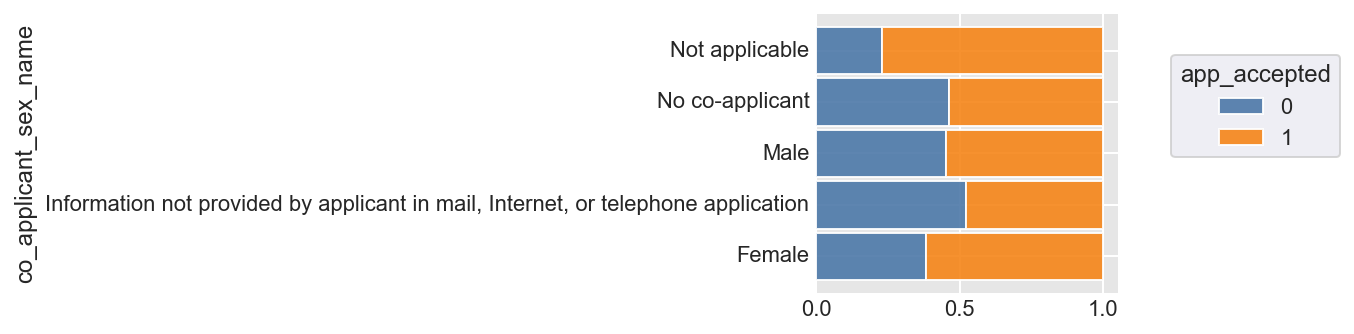

In [134]:
#Binning of Categorical Variables - Cont.
dxp.count(val = 'co_applicant_sex_name', data = df_data, split = 'app_accepted', stacked = True, normalize = 'co_applicant_sex_name', orientation = "h")

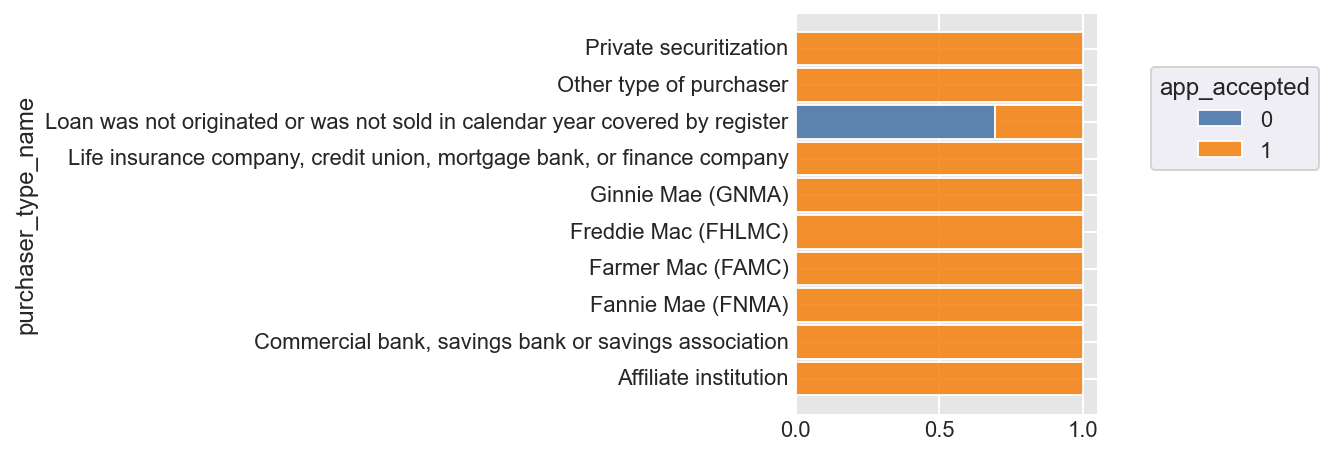

In [135]:
#Binning of Categorical Variables - Purchaser_type_name looks to be dependent on the outcome variable. It was dropped for this reason.
dxp.count(val = 'purchaser_type_name', data = df_data, split = 'app_accepted', stacked = True, normalize = 'purchaser_type_name', orientation = "h")  

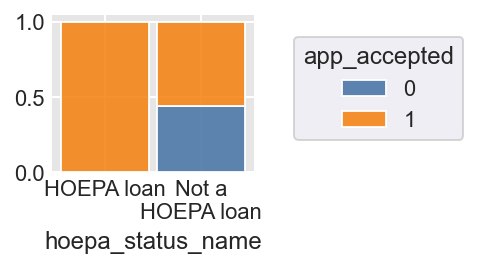

In [136]:
#Binning of Categorical Variables - Cont.
dxp.count(val = 'hoepa_status_name', data = df_data, split = 'app_accepted', stacked = True, normalize = 'hoepa_status_name')  

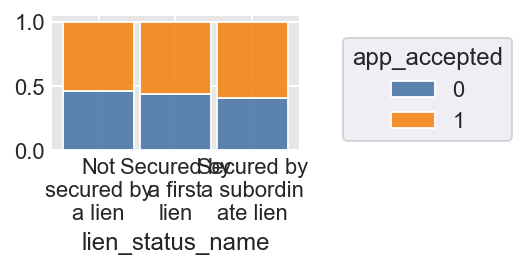

In [137]:
#Binning of Categorical Variables - Cont.
dxp.count(val = 'lien_status_name', data = df_data, split = 'app_accepted', stacked = True, normalize = 'lien_status_name')  

<AxesSubplot:xlabel='app_accepted', ylabel='count'>

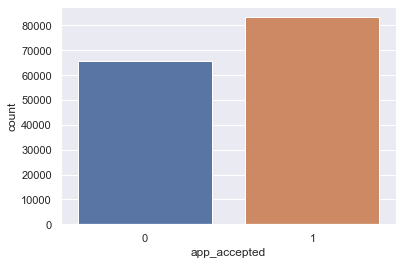

In [138]:
#Exploratory Analysis - Graph of total loans given
sns.countplot(x='app_accepted', data=df_data)

In [139]:
#Exploratory Analysis - Total number of accepted loans
df_data['app_accepted'].sum()

83323

Accepted Loans per Agency Abbreviation

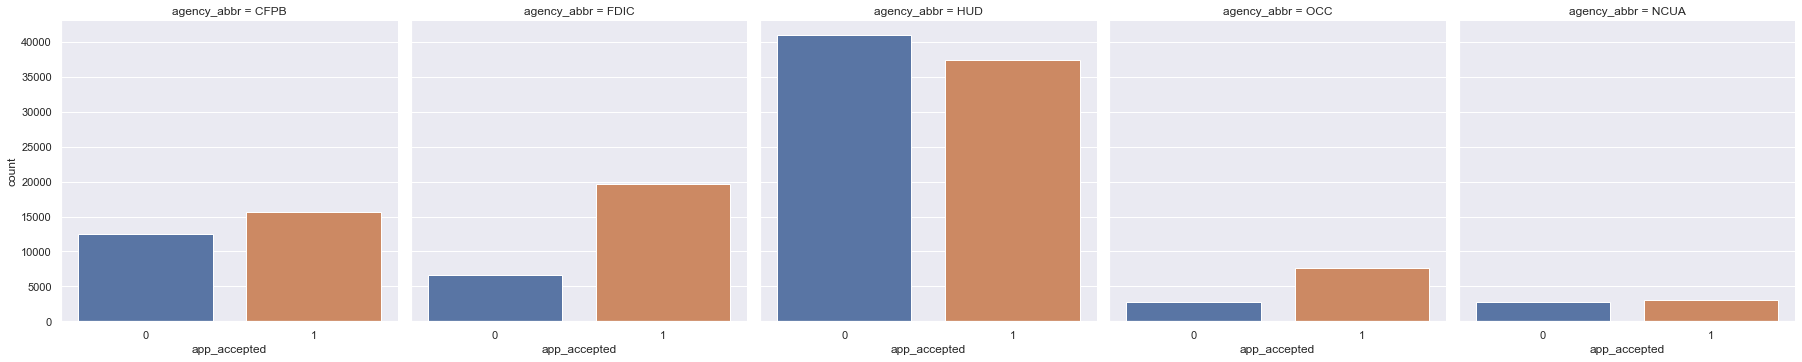

In [140]:
#Exploratory Analysis
sns.catplot(x='app_accepted', col='agency_abbr', kind='count', data=df_data)

In [141]:
#Exploratory Analysis
df_data.groupby('agency_abbr').app_accepted.value_counts()

agency_abbr  app_accepted
CFPB         1               15578
             0               12562
FDIC         1               19720
             0                6650
HUD          0               40999
             1               37439
NCUA         1                3018
             0                2750
OCC          1                7568
             0                2712
Name: app_accepted, dtype: int64

**Insights on Agency Abbreviation:** CFBP: 2nd highest # of applications, 55% acceptance rate; FDIC: 75% acc rate; FRS: 72% acc rate; HUD: highest # of applications, 48% acc rate; NCUA: 52% acc rate; OCC: 74% acceptance rate

**Accepted Loans per Loan Type**

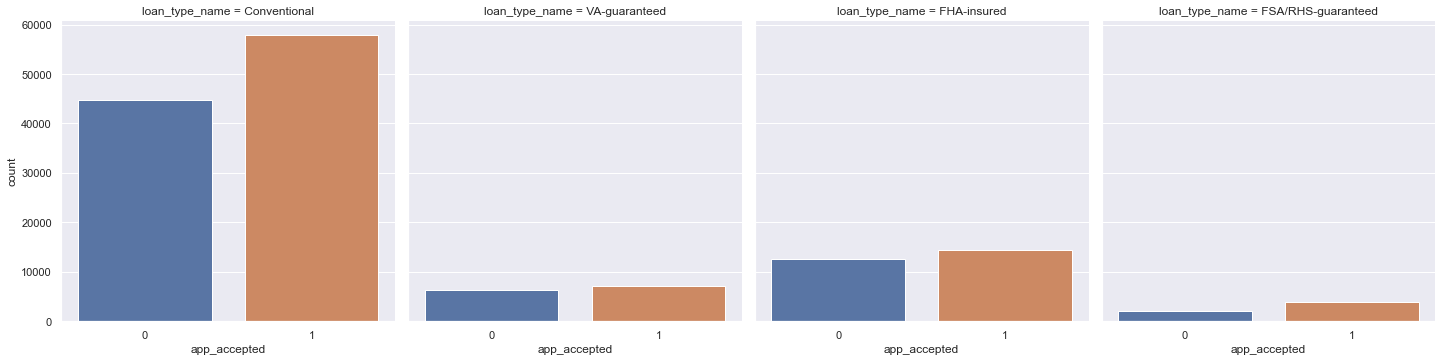

In [142]:
#Exploratory Analysis
sns.catplot(x='app_accepted', col='loan_type_name', kind='count', data=df_data)

In [143]:
#Exploratory Analysis
df_data.groupby('loan_type_name').app_accepted.value_counts()

loan_type_name      app_accepted
Conventional        1               57889
                    0               44743
FHA-insured         1               14324
                    0               12511
FSA/RHS-guaranteed  1                3978
                    0                2006
VA-guaranteed       1                7132
                    0                6413
Name: app_accepted, dtype: int64

**Insights on Loan Type:**
Conventional: highest apps, 56% acc; FHA insured: 2nd highest apps, 53% acc; FSA/RHS guaranteed: 66% acc; VA guaranteed: 53% acc

**Accepted Loans per Property Type**

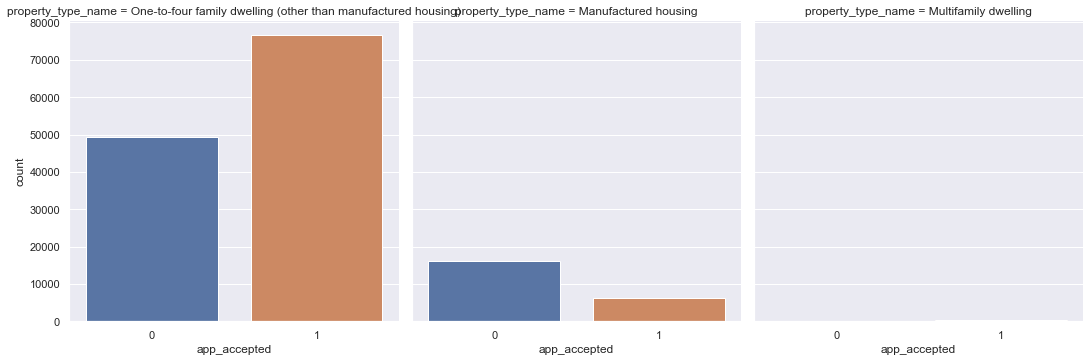

In [144]:
#Exploratory Analysis
sns.catplot(x='app_accepted', col='property_type_name', kind='count', data=df_data)

In [145]:
#Exploratory Analysis
df_data.groupby('property_type_name').app_accepted.value_counts()

property_type_name                                             app_accepted
Manufactured housing                                           0               16210
                                                               1                6325
Multifamily dwelling                                           1                 356
                                                               0                  81
One-to-four family dwelling (other than manufactured housing)  1               76642
                                                               0               49382
Name: app_accepted, dtype: int64

**Insights on Property Type:** Manufactured: 2nd highest apps, 28% acc; Multifamily: 81% acc; One-to-four family dwelling: highest apps, 61% acc

**Accepted Loans per Loan Purpose**

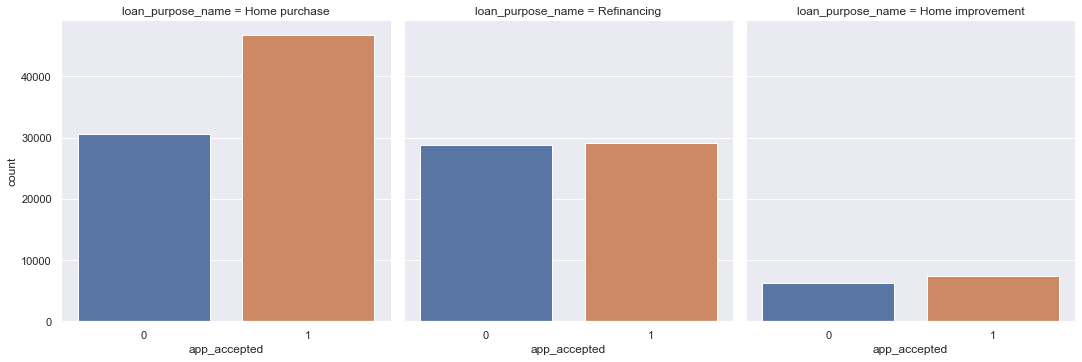

In [146]:
#Exploratory Analysis
sns.catplot(x='app_accepted', col='loan_purpose_name', kind='count', data=df_data)

In [147]:
#Exploratory Analysis
df_data.groupby('loan_purpose_name').app_accepted.value_counts()

loan_purpose_name  app_accepted
Home improvement   1                7384
                   0                6242
Home purchase      1               46769
                   0               30575
Refinancing        1               29170
                   0               28856
Name: app_accepted, dtype: int64

**Insights on Loan Purpose:** Home improvement: 54% acc; Home purchase: highest apps, 60% acc; Refinancing: 2nd highest apps, 50% acc

**Accepted Loans per Loan Amount**

In [148]:
#Exploratory Analysis - Highest and Lowest Loan Amounts
print(df_data.loanAmount.max())
print(df_data.loanAmount.min())

43448
1


**Accepted Loans per PreApproval Name**

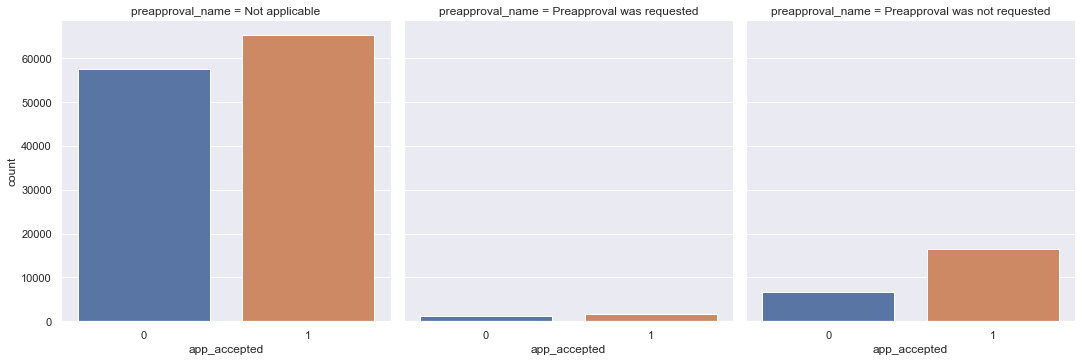

In [149]:
sns.catplot(x='app_accepted', col='preapproval_name', kind='count', data=df_data)

In [150]:
df_data.groupby('preapproval_name').app_accepted.value_counts()

preapproval_name               app_accepted
Not applicable                 1               65265
                               0               57632
Preapproval was not requested  1               16512
                               0                6761
Preapproval was requested      1                1546
                               0                1280
Name: app_accepted, dtype: int64

**Insights on PreApproval**: most of the applications had a NaN preapproval but still had a 53% acc, 55% acc for preapproval requested, 71% acc for no preapproval requested

**Accepted Loans per Applicant Race**

In [151]:
# Replace information not provided by Not applicable
df_data['applicant_race_name_1'].replace('Information not provided by applicant in mail, Internet, or telephone application', 'Not applicable', inplace=True)

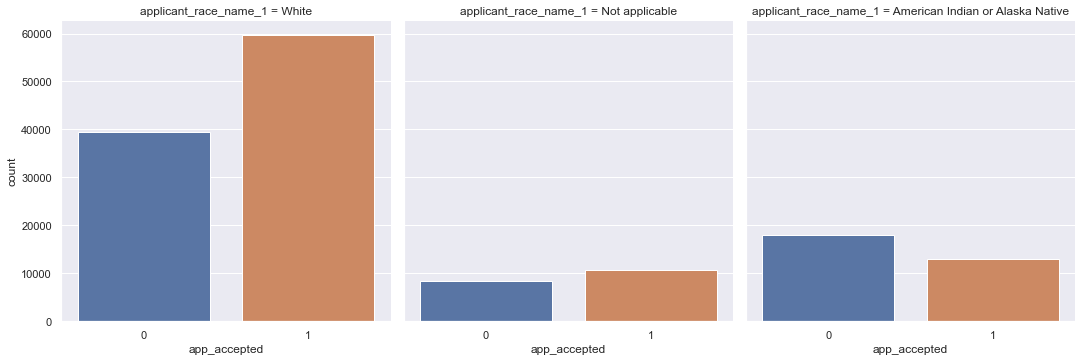

In [152]:
sns.catplot(x='app_accepted', col='applicant_race_name_1', kind='count', data=df_data)

In [153]:
df_data.groupby('applicant_race_name_1').app_accepted.value_counts()

applicant_race_name_1             app_accepted
American Indian or Alaska Native  0               17887
                                  1               12939
Not applicable                    1               10698
                                  0                8401
White                             1               59686
                                  0               39385
Name: app_accepted, dtype: int64

**Insights on Race:** American Indian/Alaska Native: 37% acc; Asian: 58% acc; Black: 42% acc; Hawaiian/Pacific Islander: 54% acc; White: 60% acc; NA: 56% acc

**Accepted Loans per Gender**

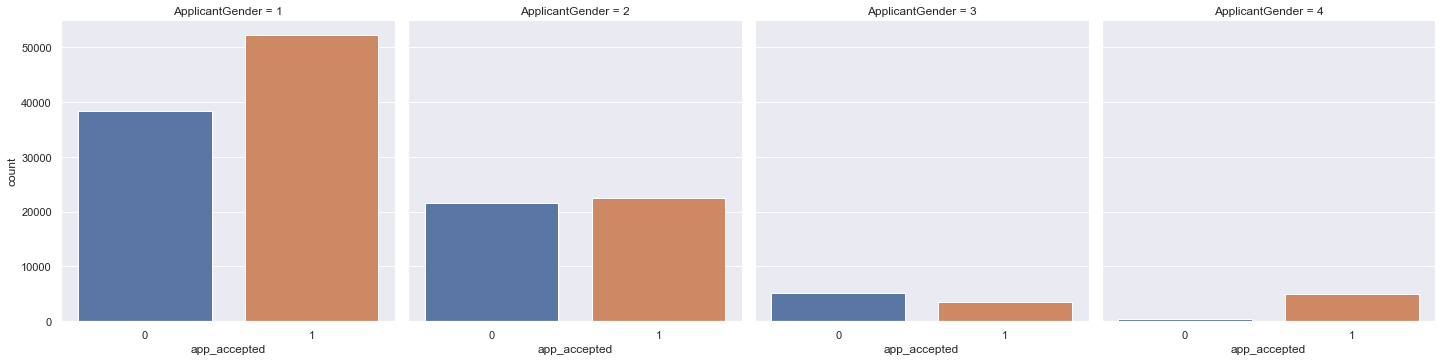

In [154]:
#Exploratory Analysis - Cont.
sns.catplot(x='app_accepted', col='ApplicantGender', kind='count', data=df_data)

In [155]:
#Exploratory Analysis - Cont.
df_data.groupby('ApplicantGender').app_accepted.value_counts()

ApplicantGender  app_accepted
1                1               52273
                 0               38403
2                1               22517
                 0               21633
3                0                5148
                 1                3553
4                1                4980
                 0                 489
Name: app_accepted, dtype: int64

**Insights on Applicant Gender:** Female: 51% acc; Male: highest apps, 58% acc; not applicable (perhaps gender neutral?): 91% acc; Info not provided: 41%

**Accepted Loans per Applicant Income**

In [156]:
#Exploratory Analysis - Lowest and Highest Income Values
print(df_data.ApplicantIncome.min())
print(df_data.ApplicantIncome.max())

1.0
147417.0


**Accepted Loans per HOEPA status**

In [157]:
#Exploratory Analysis - Cont.
df_data.groupby('hoepa_status_name').app_accepted.value_counts()

hoepa_status_name  app_accepted
HOEPA loan         1                 195
Not a HOEPA loan   1               83128
                   0               65673
Name: app_accepted, dtype: int64

**Insights on HOEPA Loans:** 100% of hoepa loans were accepted, while 56% of not hoepa loans were accepted

HOEPA:Home Ownership and Equity Protection Act

**Accepted Loans per Lien Status**

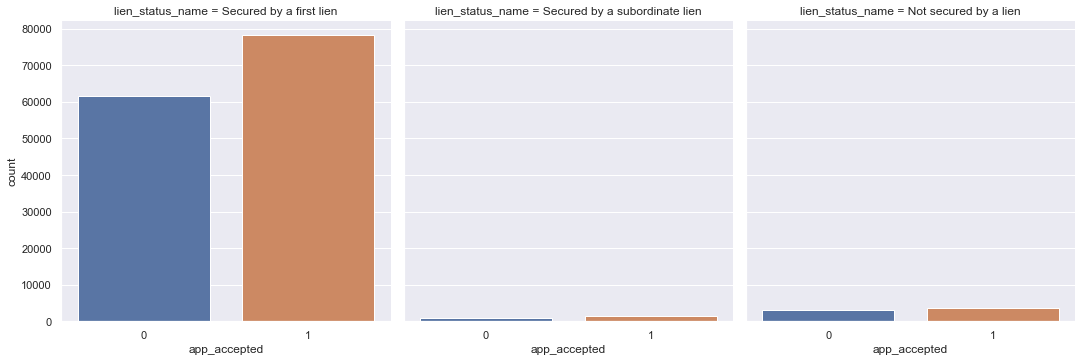

In [158]:
#Exploratory Analysis - Cont.
sns.catplot(x='app_accepted', col='lien_status_name', kind='count', data=df_data)

In [159]:
#Exploratory Analysis - Cont.
df_data.groupby('lien_status_name').app_accepted.value_counts()

lien_status_name               app_accepted
Not secured by a lien          1                3726
                               0                3202
Secured by a first lien        1               78295
                               0               61578
Secured by a subordinate lien  1                1302
                               0                 893
Name: app_accepted, dtype: int64

**Insights on Lien Status:** not secured by lien: 54% acc; secured by 1st lien: highest # of apps, 56% acc; secured by subordinate lien: 59% acc

In [160]:
#Assign dummy variables
#df_data = pd.get_dummies(df_data, columns=['agency_abbr', 'loan_type_name', 'property_type_name', 'loan_purpose_name', 'owner_occupancy_name', 'preapproval_name', 'applicant_ethnicity_name', 'co_applicant_ethnicity_name', 'applicant_race_name_1' , 'co_applicant_race_name_1', 'co_applicant_sex_name', 'purchaser_type_name', 'hoepa_status_name', 'lien_status_name'], drop_first=True)


In [161]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148996 entries, 0 to 148995
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   app_accepted                    148996 non-null  int64  
 1   agency_abbr                     148996 non-null  object 
 2   loan_type_name                  148996 non-null  object 
 3   property_type_name              148996 non-null  object 
 4   loan_purpose_name               148996 non-null  object 
 5   owner_occupancy_name            148996 non-null  object 
 6   loanAmount                      148996 non-null  int64  
 7   preapproval_name                148996 non-null  object 
 8   applicant_ethnicity_name        148996 non-null  object 
 9   co_applicant_ethnicity_name     148996 non-null  object 
 10  applicant_race_name_1           148996 non-null  object 
 11  co_applicant_race_name_1        148996 non-null  object 
 12  ApplicantGender 

In [162]:
# Fill missing values with mean column values 
#data.fillna(data.mean(), inplace=True)
# calculates the mean of each column with missing data and assigns it to an object
avg_applicant_income_000s = df_data["ApplicantIncome"].mean()
avg_population = df_data["population"].mean()
avg_minority_population = df_data["minority_population"].mean()
avg_hud_median_family_income  = df_data["hud_median_family_income"].mean()
avg_tract_to_msamd_income = df_data["tract_to_msamd_income"].mean()
avg_number_of_owner_occupied_units = df_data["number_of_owner_occupied_units"].mean()
avg_number_of_1_to_4_family_units  = df_data["number_of_1_to_4_family_units"].mean()

#Replaces missing datapoints with the average (mean) for that column
df_data["ApplicantIncome"].replace(np.nan, avg_applicant_income_000s, inplace=True)
df_data["population"].replace(np.nan, avg_population, inplace=True)
df_data["minority_population"].replace(np.nan, avg_minority_population, inplace=True)
df_data["hud_median_family_income"].replace(np.nan, avg_hud_median_family_income, inplace=True)
df_data["tract_to_msamd_income"].replace(np.nan, avg_tract_to_msamd_income, inplace=True)
df_data["number_of_owner_occupied_units"].replace(np.nan, avg_number_of_owner_occupied_units, inplace=True)
df_data["number_of_1_to_4_family_units"].replace(np.nan, avg_number_of_1_to_4_family_units, inplace=True)


In [163]:
labelEncoder = LabelEncoder()
#labelEncoder.fit(df_data['agency_name'])
#df_data['agency_name'] = labelEncoder.transform(df_data['agency_name'])
labelEncoder = LabelEncoder()
labelEncoder = LabelEncoder()
#labelEncoder.fit(data['applicant_ethnicity_name'])
#data['application_ethnicity_name'] = labelEncoder.transform(data['applicant_ethnicity_name'])
labelEncoder.fit(df_data['ApplicantGender'])
df_data['ApplicantGender'] = labelEncoder.transform(df_data['ApplicantGender'])
labelEncoder = LabelEncoder()
labelEncoder.fit(df_data['loan_type_name'])
df_data['loan_type_name'] = labelEncoder.transform(df_data['loan_type_name'])
labelEncoder.fit(df_data['hoepa_status_name'])
df_data['hoepa_status_name'] = labelEncoder.transform(df_data['hoepa_status_name'])

In [164]:
#list all of the predictors 
predictors = ['loan_type_name','loanAmount','ApplicantGender','ApplicantIncome','hoepa_status_name','population','hud_median_family_income','number_of_1_to_4_family_units']

In [165]:
#set up target, predictors, and split the training/testing partitions
X = df_data[predictors]
y = df_data['app_accepted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=0)

In [166]:
estimator = DecisionTreeClassifier()
estimator.fit(X_train, y_train)

DecisionTreeClassifier()

In [167]:
#This block of code creates a table of 29 different trees, using the Gini and
# entropy methods of purity checks, prints the accuracy of model
print('depth','gini ','entropy')
for i in range(1,30):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    gini_score = accuracy_score(y_test, pred)
     # Entropy method of purity check
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
entropy_score = accuracy_score(y_test, pred)
 #Using f-string formatting print
print(f'{i:<6}{round(gini_score,3):<6}{round(entropy_score,3)}')


depth gini  entropy
29    0.568 0.574


In [168]:
#create the final tree with the suggested depth from the above code block
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(X_train, y_train)

#test the model and calculate the accuracy of prediction
pred = dtree.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, pred),3))

Accuracy: 0.604


In [169]:
#create confusion matrix and print it
confusionMatrix = pd.DataFrame(
    confusion_matrix(y_test, pred),
    columns=['Predicted Disapprove', 'Predicted Approve'],
    index=['True Disapprove', 'True Approve']
)
print(confusionMatrix)
print()


                 Predicted Disapprove  Predicted Approve
True Disapprove                 32235              20384
True Approve                    26865              39713



In [170]:
#create a list of features and orders them 
importances = pd.DataFrame({'predictor':X_train.columns,'importance':np.round(dtree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
print(importances)
print()

                       predictor  importance
3                ApplicantIncome       0.439
1                     loanAmount       0.282
2                ApplicantGender       0.267
5                     population       0.011
0                 loan_type_name       0.000
4              hoepa_status_name       0.000
6       hud_median_family_income       0.000
7  number_of_1_to_4_family_units       0.000



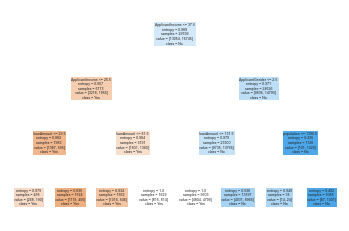

In [171]:
plt.figure()
plot_tree(dtree, filled=True, feature_names=predictors, class_names=['Yes','No'])
plt.savefig('TreePlot1.pdf')
plt.show()

Therefore, this Decision Tree Model can predict the Loan Approral with 60.4 % accuracy. We believe that if we can select the predictor with higher feature importance we will be able to increase the accuracy of the model. The most important feature from this model was applicantIncome with 43.9% importance, loanAmount with 28.2% importance, ApplicationGender with 26.7% importance, and population with 1.1 % importance. This helped to identify some of the key feature in our dataset for future analysis.